In [24]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [25]:
physical_devices = tf.config.list_physical_devices('GPU') 
try: 
  tf.config.experimental.set_memory_growth(physical_devices[0], True) 
except: 
  # Invalid device or cannot modify virtual devices once initialized. 
  pass 

In [26]:
data = pd.read_csv("data.txt", delimiter=' ', header=None, skiprows=1, names=['c1','c2','c3','c4','c5', 'c6'])
# data = pd.read_csv( 'data.txt' )
data.head()
# print(len(data))

c1     c2     c3     c4     c5      c6
0  47.88   8.39  49.29   6.31 -37.27  304.84
1  11.42 -46.21  -5.55 -15.94  25.05 -168.82
2  17.83   9.05  24.55 -42.49  37.12  196.37
3  41.77 -49.00 -42.52  37.32 -14.91 -296.75
4  34.34  -0.67  24.90  35.26  17.59   55.59

In [27]:
#Changing pandas dataframe to numpy array
X = data[ ['c1','c2','c3','c4', 'c5'] ].values 
y =  data[ [ 'c6' ] ].values 


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)
# print(X_train, X_test, y_train, y_test)

In [31]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(5, input_dim=5, activation="relu")) # first hidden layer
model.add(Dense(5, activation="relu")) # second hidden layer
model.add(Dense(495, activation="softmax"))

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_6 (Dense)              (None, 495)               2970      
Total params: 3,030
Trainable params: 3,030
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=len(data))

Epoch 1/2000
447/447 [==============================] - 0s 292us/step - loss: 6.2042 - accuracy: 0.0045
Epoch 2/2000
447/447 [==============================] - 0s 22us/step - loss: 6.2029 - accuracy: 0.0045
Epoch 3/2000
447/447 [==============================] - 0s 20us/step - loss: 6.2016 - accuracy: 0.0045
Epoch 4/2000
447/447 [==============================] - 0s 20us/step - loss: 6.2003 - accuracy: 0.0067
Epoch 5/2000
447/447 [==============================] - 0s 49us/step - loss: 6.1989 - accuracy: 0.0067
Epoch 6/2000
447/447 [==============================] - 0s 40us/step - loss: 6.1976 - accuracy: 0.0067
Epoch 7/2000
447/447 [==============================] - 0s 22us/step - loss: 6.1963 - accuracy: 0.0067
Epoch 8/2000
447/447 [==============================] - 0s 29us/step - loss: 6.1949 - accuracy: 0.0067
Epoch 9/2000
447/447 [==============================] - 0s 36us/step - loss: 6.1935 - accuracy: 0.0067
Epoch 10/2000
447/447 [==============================] - 0s 31us/step - 

Epoch 80/2000
447/447 [==============================] - 0s 20us/step - loss: 6.0223 - accuracy: 0.0157
Epoch 81/2000
447/447 [==============================] - 0s 25us/step - loss: 6.0186 - accuracy: 0.0157
Epoch 82/2000
447/447 [==============================] - 0s 25us/step - loss: 6.0148 - accuracy: 0.0157
Epoch 83/2000
447/447 [==============================] - 0s 25us/step - loss: 6.0110 - accuracy: 0.0157
Epoch 84/2000
447/447 [==============================] - 0s 16us/step - loss: 6.0071 - accuracy: 0.0157
Epoch 85/2000
447/447 [==============================] - 0s 18us/step - loss: 6.0032 - accuracy: 0.0157
Epoch 86/2000
447/447 [==============================] - 0s 27us/step - loss: 5.9993 - accuracy: 0.0157
Epoch 87/2000
447/447 [==============================] - 0s 20us/step - loss: 5.9953 - accuracy: 0.0179
Epoch 88/2000
447/447 [==============================] - 0s 16us/step - loss: 5.9912 - accuracy: 0.0179
Epoch 89/2000
447/447 [==============================] - 0s 20us

Epoch 159/2000
447/447 [==============================] - 0s 31us/step - loss: 5.6310 - accuracy: 0.0157
Epoch 160/2000
447/447 [==============================] - 0s 36us/step - loss: 5.6252 - accuracy: 0.0157
Epoch 161/2000
447/447 [==============================] - 0s 33us/step - loss: 5.6194 - accuracy: 0.0157
Epoch 162/2000
447/447 [==============================] - 0s 33us/step - loss: 5.6136 - accuracy: 0.0157
Epoch 163/2000
447/447 [==============================] - 0s 33us/step - loss: 5.6078 - accuracy: 0.0157
Epoch 164/2000
447/447 [==============================] - 0s 33us/step - loss: 5.6020 - accuracy: 0.0157
Epoch 165/2000
447/447 [==============================] - 0s 36us/step - loss: 5.5961 - accuracy: 0.0179
Epoch 166/2000
447/447 [==============================] - 0s 18us/step - loss: 5.5903 - accuracy: 0.0201
Epoch 167/2000
447/447 [==============================] - 0s 22us/step - loss: 5.5845 - accuracy: 0.0201
Epoch 168/2000
447/447 [==============================]

Epoch 238/2000
447/447 [==============================] - 0s 18us/step - loss: 5.1623 - accuracy: 0.0268
Epoch 239/2000
447/447 [==============================] - 0s 18us/step - loss: 5.1564 - accuracy: 0.0268
Epoch 240/2000
447/447 [==============================] - 0s 13us/step - loss: 5.1505 - accuracy: 0.0268
Epoch 241/2000
447/447 [==============================] - 0s 20us/step - loss: 5.1446 - accuracy: 0.0268
Epoch 242/2000
447/447 [==============================] - 0s 22us/step - loss: 5.1387 - accuracy: 0.0268
Epoch 243/2000
447/447 [==============================] - 0s 16us/step - loss: 5.1328 - accuracy: 0.0291
Epoch 244/2000
447/447 [==============================] - 0s 20us/step - loss: 5.1269 - accuracy: 0.0291
Epoch 245/2000
447/447 [==============================] - 0s 16us/step - loss: 5.1210 - accuracy: 0.0313
Epoch 246/2000
447/447 [==============================] - 0s 20us/step - loss: 5.1151 - accuracy: 0.0313
Epoch 247/2000
447/447 [==============================]

Epoch 317/2000
447/447 [==============================] - 0s 20us/step - loss: 4.7131 - accuracy: 0.0515
Epoch 318/2000
447/447 [==============================] - 0s 18us/step - loss: 4.7077 - accuracy: 0.0537
Epoch 319/2000
447/447 [==============================] - 0s 25us/step - loss: 4.7023 - accuracy: 0.0537
Epoch 320/2000
447/447 [==============================] - 0s 18us/step - loss: 4.6970 - accuracy: 0.0537
Epoch 321/2000
447/447 [==============================] - 0s 20us/step - loss: 4.6917 - accuracy: 0.0537
Epoch 322/2000
447/447 [==============================] - 0s 18us/step - loss: 4.6863 - accuracy: 0.0537
Epoch 323/2000
447/447 [==============================] - 0s 16us/step - loss: 4.6810 - accuracy: 0.0537
Epoch 324/2000
447/447 [==============================] - 0s 18us/step - loss: 4.6757 - accuracy: 0.0537
Epoch 325/2000
447/447 [==============================] - 0s 22us/step - loss: 4.6704 - accuracy: 0.0537
Epoch 326/2000
447/447 [==============================]

447/447 [==============================] - 0s 18us/step - loss: 3.9666 - accuracy: 0.1857
Epoch 474/2000
447/447 [==============================] - 0s 20us/step - loss: 3.9622 - accuracy: 0.1879
Epoch 475/2000
447/447 [==============================] - 0s 22us/step - loss: 3.9578 - accuracy: 0.1902
Epoch 476/2000
447/447 [==============================] - 0s 18us/step - loss: 3.9534 - accuracy: 0.1924
Epoch 477/2000
447/447 [==============================] - 0s 16us/step - loss: 3.9490 - accuracy: 0.1924
Epoch 478/2000
447/447 [==============================] - 0s 18us/step - loss: 3.9446 - accuracy: 0.1946
Epoch 479/2000
447/447 [==============================] - 0s 16us/step - loss: 3.9402 - accuracy: 0.1991
Epoch 480/2000
447/447 [==============================] - 0s 20us/step - loss: 3.9358 - accuracy: 0.2013
Epoch 481/2000
447/447 [==============================] - 0s 18us/step - loss: 3.9314 - accuracy: 0.2058
Epoch 482/2000
447/447 [==============================] - 0s 16us/step

Epoch 552/2000
447/447 [==============================] - 0s 27us/step - loss: 3.6211 - accuracy: 0.2752
Epoch 553/2000
447/447 [==============================] - 0s 25us/step - loss: 3.6167 - accuracy: 0.2774
Epoch 554/2000
447/447 [==============================] - 0s 24us/step - loss: 3.6124 - accuracy: 0.2774
Epoch 555/2000
447/447 [==============================] - 0s 27us/step - loss: 3.6081 - accuracy: 0.2774
Epoch 556/2000
447/447 [==============================] - 0s 31us/step - loss: 3.6037 - accuracy: 0.2796
Epoch 557/2000
447/447 [==============================] - 0s 49us/step - loss: 3.5994 - accuracy: 0.2796
Epoch 558/2000
447/447 [==============================] - 0s 25us/step - loss: 3.5950 - accuracy: 0.2796
Epoch 559/2000
447/447 [==============================] - 0s 25us/step - loss: 3.5907 - accuracy: 0.2819
Epoch 560/2000
447/447 [==============================] - 0s 22us/step - loss: 3.5864 - accuracy: 0.2886
Epoch 561/2000
447/447 [==============================]

Epoch 631/2000
447/447 [==============================] - 0s 21us/step - loss: 3.2836 - accuracy: 0.3848
Epoch 632/2000
447/447 [==============================] - 0s 16us/step - loss: 3.2794 - accuracy: 0.3848
Epoch 633/2000
447/447 [==============================] - 0s 25us/step - loss: 3.2752 - accuracy: 0.3848
Epoch 634/2000
447/447 [==============================] - 0s 18us/step - loss: 3.2710 - accuracy: 0.3870
Epoch 635/2000
447/447 [==============================] - 0s 16us/step - loss: 3.2668 - accuracy: 0.3915
Epoch 636/2000
447/447 [==============================] - 0s 20us/step - loss: 3.2627 - accuracy: 0.3915
Epoch 637/2000
447/447 [==============================] - 0s 16us/step - loss: 3.2585 - accuracy: 0.3937
Epoch 638/2000
447/447 [==============================] - 0s 18us/step - loss: 3.2543 - accuracy: 0.3937
Epoch 639/2000
447/447 [==============================] - 0s 22us/step - loss: 3.2502 - accuracy: 0.3937
Epoch 640/2000
447/447 [==============================]

447/447 [==============================] - 0s 18us/step - loss: 2.9684 - accuracy: 0.5101
Epoch 710/2000
447/447 [==============================] - 0s 16us/step - loss: 2.9645 - accuracy: 0.5123
Epoch 711/2000
447/447 [==============================] - 0s 20us/step - loss: 2.9606 - accuracy: 0.5123
Epoch 712/2000
447/447 [==============================] - 0s 18us/step - loss: 2.9568 - accuracy: 0.5123
Epoch 713/2000
447/447 [==============================] - 0s 18us/step - loss: 2.9529 - accuracy: 0.5123
Epoch 714/2000
447/447 [==============================] - 0s 20us/step - loss: 2.9490 - accuracy: 0.5123
Epoch 715/2000
447/447 [==============================] - 0s 27us/step - loss: 2.9451 - accuracy: 0.5145
Epoch 716/2000
447/447 [==============================] - 0s 22us/step - loss: 2.9413 - accuracy: 0.5145
Epoch 717/2000
447/447 [==============================] - 0s 16us/step - loss: 2.9374 - accuracy: 0.5145
Epoch 718/2000
447/447 [==============================] - 0s 20us/step

Epoch 788/2000
447/447 [==============================] - 0s 25us/step - loss: 2.6723 - accuracy: 0.5772
Epoch 789/2000
447/447 [==============================] - 0s 22us/step - loss: 2.6688 - accuracy: 0.5772
Epoch 790/2000
447/447 [==============================] - 0s 22us/step - loss: 2.6652 - accuracy: 0.5794
Epoch 791/2000
447/447 [==============================] - 0s 22us/step - loss: 2.6616 - accuracy: 0.5794
Epoch 792/2000
447/447 [==============================] - 0s 20us/step - loss: 2.6580 - accuracy: 0.5794
Epoch 793/2000
447/447 [==============================] - 0s 16us/step - loss: 2.6545 - accuracy: 0.5794
Epoch 794/2000
447/447 [==============================] - 0s 22us/step - loss: 2.6509 - accuracy: 0.5794
Epoch 795/2000
447/447 [==============================] - 0s 22us/step - loss: 2.6474 - accuracy: 0.5794
Epoch 796/2000
447/447 [==============================] - 0s 16us/step - loss: 2.6438 - accuracy: 0.5817
Epoch 797/2000
447/447 [==============================]

447/447 [==============================] - 0s 22us/step - loss: 2.4052 - accuracy: 0.6376
Epoch 867/2000
447/447 [==============================] - 0s 29us/step - loss: 2.4019 - accuracy: 0.6398
Epoch 868/2000
447/447 [==============================] - 0s 18us/step - loss: 2.3987 - accuracy: 0.6398
Epoch 869/2000
447/447 [==============================] - 0s 29us/step - loss: 2.3954 - accuracy: 0.6421
Epoch 870/2000
447/447 [==============================] - 0s 25us/step - loss: 2.3921 - accuracy: 0.6443
Epoch 871/2000
447/447 [==============================] - 0s 22us/step - loss: 2.3889 - accuracy: 0.6465
Epoch 872/2000
447/447 [==============================] - 0s 18us/step - loss: 2.3856 - accuracy: 0.6465
Epoch 873/2000
447/447 [==============================] - 0s 18us/step - loss: 2.3824 - accuracy: 0.6488
Epoch 874/2000
447/447 [==============================] - 0s 22us/step - loss: 2.3791 - accuracy: 0.6488
Epoch 875/2000
447/447 [==============================] - 0s 22us/step

Epoch 945/2000
447/447 [==============================] - 0s 27us/step - loss: 2.1580 - accuracy: 0.7226
Epoch 946/2000
447/447 [==============================] - 0s 18us/step - loss: 2.1550 - accuracy: 0.7226
Epoch 947/2000
447/447 [==============================] - 0s 20us/step - loss: 2.1521 - accuracy: 0.7271
Epoch 948/2000
447/447 [==============================] - 0s 22us/step - loss: 2.1491 - accuracy: 0.7271
Epoch 949/2000
447/447 [==============================] - 0s 16us/step - loss: 2.1462 - accuracy: 0.7271
Epoch 950/2000
447/447 [==============================] - 0s 18us/step - loss: 2.1432 - accuracy: 0.7271
Epoch 951/2000
447/447 [==============================] - 0s 18us/step - loss: 2.1403 - accuracy: 0.7271
Epoch 952/2000
447/447 [==============================] - 0s 16us/step - loss: 2.1373 - accuracy: 0.7271
Epoch 953/2000
447/447 [==============================] - 0s 22us/step - loss: 2.1344 - accuracy: 0.7271
Epoch 954/2000
447/447 [==============================]

Epoch 1023/2000
447/447 [==============================] - 0s 18us/step - loss: 1.9381 - accuracy: 0.7830
Epoch 1024/2000
447/447 [==============================] - 0s 20us/step - loss: 1.9354 - accuracy: 0.7830
Epoch 1025/2000
447/447 [==============================] - 0s 18us/step - loss: 1.9328 - accuracy: 0.7852
Epoch 1026/2000
447/447 [==============================] - 0s 18us/step - loss: 1.9301 - accuracy: 0.7852
Epoch 1027/2000
447/447 [==============================] - 0s 20us/step - loss: 1.9275 - accuracy: 0.7852
Epoch 1028/2000
447/447 [==============================] - 0s 29us/step - loss: 1.9249 - accuracy: 0.7852
Epoch 1029/2000
447/447 [==============================] - 0s 25us/step - loss: 1.9222 - accuracy: 0.7852
Epoch 1030/2000
447/447 [==============================] - 0s 16us/step - loss: 1.9196 - accuracy: 0.7852
Epoch 1031/2000
447/447 [==============================] - 0s 20us/step - loss: 1.9169 - accuracy: 0.7852
Epoch 1032/2000
447/447 [=====================

Epoch 1101/2000
447/447 [==============================] - 0s 20us/step - loss: 1.7412 - accuracy: 0.8210
Epoch 1102/2000
447/447 [==============================] - 0s 25us/step - loss: 1.7388 - accuracy: 0.8210
Epoch 1103/2000
447/447 [==============================] - 0s 20us/step - loss: 1.7364 - accuracy: 0.8210
Epoch 1104/2000
447/447 [==============================] - 0s 22us/step - loss: 1.7340 - accuracy: 0.8233
Epoch 1105/2000
447/447 [==============================] - 0s 36us/step - loss: 1.7316 - accuracy: 0.8233
Epoch 1106/2000
447/447 [==============================] - 0s 31us/step - loss: 1.7292 - accuracy: 0.8233
Epoch 1107/2000
447/447 [==============================] - 0s 27us/step - loss: 1.7268 - accuracy: 0.8233
Epoch 1108/2000
447/447 [==============================] - 0s 22us/step - loss: 1.7245 - accuracy: 0.8233
Epoch 1109/2000
447/447 [==============================] - 0s 18us/step - loss: 1.7221 - accuracy: 0.8255
Epoch 1110/2000
447/447 [=====================

Epoch 1179/2000
447/447 [==============================] - 0s 27us/step - loss: 1.5626 - accuracy: 0.8501
Epoch 1180/2000
447/447 [==============================] - 0s 22us/step - loss: 1.5605 - accuracy: 0.8501
Epoch 1181/2000
447/447 [==============================] - 0s 29us/step - loss: 1.5583 - accuracy: 0.8501
Epoch 1182/2000
447/447 [==============================] - 0s 27us/step - loss: 1.5561 - accuracy: 0.8523
Epoch 1183/2000
447/447 [==============================] - 0s 22us/step - loss: 1.5539 - accuracy: 0.8523
Epoch 1184/2000
447/447 [==============================] - 0s 18us/step - loss: 1.5518 - accuracy: 0.8523
Epoch 1185/2000
447/447 [==============================] - 0s 22us/step - loss: 1.5496 - accuracy: 0.8523
Epoch 1186/2000
447/447 [==============================] - 0s 29us/step - loss: 1.5474 - accuracy: 0.8546
Epoch 1187/2000
447/447 [==============================] - 0s 27us/step - loss: 1.5453 - accuracy: 0.8546
Epoch 1188/2000
447/447 [=====================

Epoch 1257/2000
447/447 [==============================] - 0s 22us/step - loss: 1.4011 - accuracy: 0.8725
Epoch 1258/2000
447/447 [==============================] - 0s 18us/step - loss: 1.3991 - accuracy: 0.8725
Epoch 1259/2000
447/447 [==============================] - 0s 20us/step - loss: 1.3971 - accuracy: 0.8747
Epoch 1260/2000
447/447 [==============================] - 0s 27us/step - loss: 1.3952 - accuracy: 0.8770
Epoch 1261/2000
447/447 [==============================] - 0s 27us/step - loss: 1.3932 - accuracy: 0.8770
Epoch 1262/2000
447/447 [==============================] - 0s 22us/step - loss: 1.3912 - accuracy: 0.8792
Epoch 1263/2000
447/447 [==============================] - 0s 22us/step - loss: 1.3893 - accuracy: 0.8814
Epoch 1264/2000
447/447 [==============================] - 0s 16us/step - loss: 1.3873 - accuracy: 0.8814
Epoch 1265/2000
447/447 [==============================] - 0s 18us/step - loss: 1.3853 - accuracy: 0.8814
Epoch 1266/2000
447/447 [=====================

Epoch 1335/2000
447/447 [==============================] - 0s 18us/step - loss: 1.2539 - accuracy: 0.8949
Epoch 1336/2000
447/447 [==============================] - 0s 20us/step - loss: 1.2521 - accuracy: 0.8949
Epoch 1337/2000
447/447 [==============================] - 0s 18us/step - loss: 1.2503 - accuracy: 0.8971
Epoch 1338/2000
447/447 [==============================] - 0s 18us/step - loss: 1.2485 - accuracy: 0.8971
Epoch 1339/2000
447/447 [==============================] - 0s 22us/step - loss: 1.2467 - accuracy: 0.8971
Epoch 1340/2000
447/447 [==============================] - 0s 18us/step - loss: 1.2449 - accuracy: 0.8971
Epoch 1341/2000
447/447 [==============================] - 0s 13us/step - loss: 1.2432 - accuracy: 0.8993
Epoch 1342/2000
447/447 [==============================] - 0s 20us/step - loss: 1.2414 - accuracy: 0.8993
Epoch 1343/2000
447/447 [==============================] - 0s 20us/step - loss: 1.2396 - accuracy: 0.9016
Epoch 1344/2000
447/447 [=====================

Epoch 1413/2000
447/447 [==============================] - 0s 20us/step - loss: 1.1211 - accuracy: 0.9351
Epoch 1414/2000
447/447 [==============================] - 0s 36us/step - loss: 1.1195 - accuracy: 0.9351
Epoch 1415/2000
447/447 [==============================] - 0s 25us/step - loss: 1.1178 - accuracy: 0.9351
Epoch 1416/2000
447/447 [==============================] - 0s 21us/step - loss: 1.1162 - accuracy: 0.9351
Epoch 1417/2000
447/447 [==============================] - 0s 18us/step - loss: 1.1146 - accuracy: 0.9351
Epoch 1418/2000
447/447 [==============================] - 0s 20us/step - loss: 1.1130 - accuracy: 0.9351
Epoch 1419/2000
447/447 [==============================] - 0s 18us/step - loss: 1.1114 - accuracy: 0.9351
Epoch 1420/2000
447/447 [==============================] - 0s 16us/step - loss: 1.1098 - accuracy: 0.9351
Epoch 1421/2000
447/447 [==============================] - 0s 20us/step - loss: 1.1082 - accuracy: 0.9329
Epoch 1422/2000
447/447 [=====================

Epoch 1491/2000
447/447 [==============================] - 0s 18us/step - loss: 1.0017 - accuracy: 0.9463
Epoch 1492/2000
447/447 [==============================] - 0s 22us/step - loss: 1.0003 - accuracy: 0.9463
Epoch 1493/2000
447/447 [==============================] - 0s 22us/step - loss: 0.9988 - accuracy: 0.9441
Epoch 1494/2000
447/447 [==============================] - 0s 16us/step - loss: 0.9974 - accuracy: 0.9441
Epoch 1495/2000
447/447 [==============================] - 0s 18us/step - loss: 0.9960 - accuracy: 0.9441
Epoch 1496/2000
447/447 [==============================] - 0s 22us/step - loss: 0.9945 - accuracy: 0.9441
Epoch 1497/2000
447/447 [==============================] - 0s 18us/step - loss: 0.9931 - accuracy: 0.9441
Epoch 1498/2000
447/447 [==============================] - 0s 20us/step - loss: 0.9917 - accuracy: 0.9441
Epoch 1499/2000
447/447 [==============================] - 0s 25us/step - loss: 0.9902 - accuracy: 0.9441
Epoch 1500/2000
447/447 [=====================

Epoch 1569/2000
447/447 [==============================] - 0s 20us/step - loss: 0.8959 - accuracy: 0.9530
Epoch 1570/2000
447/447 [==============================] - 0s 25us/step - loss: 0.8946 - accuracy: 0.9530
Epoch 1571/2000
447/447 [==============================] - 0s 20us/step - loss: 0.8934 - accuracy: 0.9530
Epoch 1572/2000
447/447 [==============================] - 0s 18us/step - loss: 0.8921 - accuracy: 0.9530
Epoch 1573/2000
447/447 [==============================] - 0s 19us/step - loss: 0.8908 - accuracy: 0.9530
Epoch 1574/2000
447/447 [==============================] - 0s 22us/step - loss: 0.8896 - accuracy: 0.9530
Epoch 1575/2000
447/447 [==============================] - 0s 16us/step - loss: 0.8883 - accuracy: 0.9530
Epoch 1576/2000
447/447 [==============================] - 0s 18us/step - loss: 0.8870 - accuracy: 0.9530
Epoch 1577/2000
447/447 [==============================] - 0s 22us/step - loss: 0.8858 - accuracy: 0.9530
Epoch 1578/2000
447/447 [=====================

Epoch 1647/2000
447/447 [==============================] - 0s 18us/step - loss: 0.8026 - accuracy: 0.9553
Epoch 1648/2000
447/447 [==============================] - 0s 16us/step - loss: 0.8014 - accuracy: 0.9575
Epoch 1649/2000
447/447 [==============================] - 0s 29us/step - loss: 0.8003 - accuracy: 0.9575
Epoch 1650/2000
447/447 [==============================] - 0s 27us/step - loss: 0.7992 - accuracy: 0.9553
Epoch 1651/2000
447/447 [==============================] - 0s 20us/step - loss: 0.7981 - accuracy: 0.9575
Epoch 1652/2000
447/447 [==============================] - 0s 18us/step - loss: 0.7970 - accuracy: 0.9575
Epoch 1653/2000
447/447 [==============================] - 0s 16us/step - loss: 0.7959 - accuracy: 0.9575
Epoch 1654/2000
447/447 [==============================] - 0s 20us/step - loss: 0.7948 - accuracy: 0.9597
Epoch 1655/2000
447/447 [==============================] - 0s 18us/step - loss: 0.7936 - accuracy: 0.9597
Epoch 1656/2000
447/447 [=====================

Epoch 1725/2000
447/447 [==============================] - 0s 18us/step - loss: 0.7202 - accuracy: 0.9687
Epoch 1726/2000
447/447 [==============================] - 0s 18us/step - loss: 0.7192 - accuracy: 0.9687
Epoch 1727/2000
447/447 [==============================] - 0s 18us/step - loss: 0.7182 - accuracy: 0.9687
Epoch 1728/2000
447/447 [==============================] - 0s 18us/step - loss: 0.7172 - accuracy: 0.9687
Epoch 1729/2000
447/447 [==============================] - 0s 13us/step - loss: 0.7163 - accuracy: 0.9709
Epoch 1730/2000
447/447 [==============================] - 0s 20us/step - loss: 0.7153 - accuracy: 0.9709
Epoch 1731/2000
447/447 [==============================] - 0s 13us/step - loss: 0.7143 - accuracy: 0.9709
Epoch 1732/2000
447/447 [==============================] - 0s 16us/step - loss: 0.7133 - accuracy: 0.9709
Epoch 1733/2000
447/447 [==============================] - 0s 18us/step - loss: 0.7123 - accuracy: 0.9732
Epoch 1734/2000
447/447 [=====================

Epoch 1803/2000
447/447 [==============================] - 0s 18us/step - loss: 0.6473 - accuracy: 0.9754
Epoch 1804/2000
447/447 [==============================] - 0s 17us/step - loss: 0.6464 - accuracy: 0.9754
Epoch 1805/2000
447/447 [==============================] - 0s 27us/step - loss: 0.6456 - accuracy: 0.9754
Epoch 1806/2000
447/447 [==============================] - 0s 25us/step - loss: 0.6447 - accuracy: 0.9732
Epoch 1807/2000
447/447 [==============================] - 0s 20us/step - loss: 0.6438 - accuracy: 0.9732
Epoch 1808/2000
447/447 [==============================] - 0s 18us/step - loss: 0.6430 - accuracy: 0.9754
Epoch 1809/2000
447/447 [==============================] - 0s 25us/step - loss: 0.6421 - accuracy: 0.9754
Epoch 1810/2000
447/447 [==============================] - 0s 25us/step - loss: 0.6412 - accuracy: 0.9754
Epoch 1811/2000
447/447 [==============================] - 0s 22us/step - loss: 0.6403 - accuracy: 0.9754
Epoch 1812/2000
447/447 [=====================

Epoch 1881/2000
447/447 [==============================] - 0s 18us/step - loss: 0.5830 - accuracy: 0.9799
Epoch 1882/2000
447/447 [==============================] - 0s 27us/step - loss: 0.5823 - accuracy: 0.9799
Epoch 1883/2000
447/447 [==============================] - 0s 22us/step - loss: 0.5815 - accuracy: 0.9799
Epoch 1884/2000
447/447 [==============================] - 0s 36us/step - loss: 0.5807 - accuracy: 0.9799
Epoch 1885/2000
447/447 [==============================] - 0s 31us/step - loss: 0.5800 - accuracy: 0.9799
Epoch 1886/2000
447/447 [==============================] - 0s 22us/step - loss: 0.5792 - accuracy: 0.9799
Epoch 1887/2000
447/447 [==============================] - 0s 20us/step - loss: 0.5784 - accuracy: 0.9799
Epoch 1888/2000
447/447 [==============================] - 0s 18us/step - loss: 0.5777 - accuracy: 0.9799
Epoch 1889/2000
447/447 [==============================] - 0s 22us/step - loss: 0.5769 - accuracy: 0.9799
Epoch 1890/2000
447/447 [=====================

Epoch 1959/2000
447/447 [==============================] - 0s 27us/step - loss: 0.5260 - accuracy: 0.9821
Epoch 1960/2000
447/447 [==============================] - 0s 18us/step - loss: 0.5254 - accuracy: 0.9821
Epoch 1961/2000
447/447 [==============================] - 0s 22us/step - loss: 0.5247 - accuracy: 0.9821
Epoch 1962/2000
447/447 [==============================] - 0s 20us/step - loss: 0.5240 - accuracy: 0.9821
Epoch 1963/2000
447/447 [==============================] - 0s 16us/step - loss: 0.5233 - accuracy: 0.9821
Epoch 1964/2000
447/447 [==============================] - 0s 22us/step - loss: 0.5226 - accuracy: 0.9821
Epoch 1965/2000
447/447 [==============================] - 0s 18us/step - loss: 0.5219 - accuracy: 0.9821
Epoch 1966/2000
447/447 [==============================] - 0s 16us/step - loss: 0.5212 - accuracy: 0.9821
Epoch 1967/2000
447/447 [==============================] - 0s 22us/step - loss: 0.5206 - accuracy: 0.9821
Epoch 1968/2000
447/447 [=====================

In [34]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

497/497 [==============================] - 0s 138us/step
Accuracy: 88.53


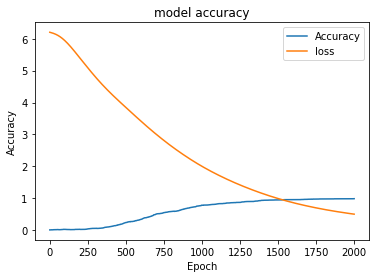

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()